In [1]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image
import cv2


%matplotlib inline


#이미지 호출에 따른 흑백 또는 컬러로 출력
def imshow(tit,image):
    plt.title(tit)
    if len(image.shape) == 3: #행렬의 크기가 나옴, 컬러영상일경우 3이 나옴
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else: # 흑백영상일 경우 2가 나옴
        plt.imshow(image, cmap='gray')
    plt.show()

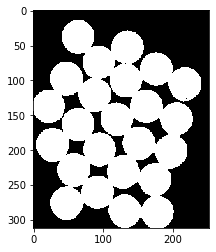

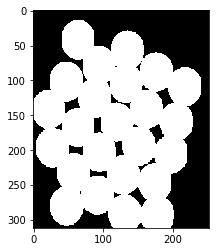

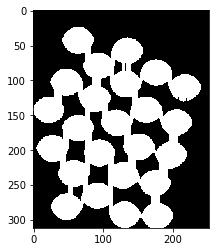

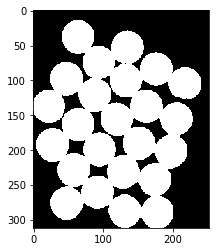

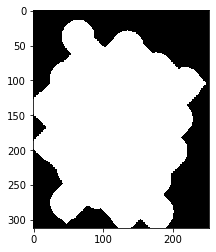

In [31]:
#침식연산자를 이용하여 붙어있는 동전들 떨어트리기
img = cv2.imread('./data/water_coins.jpg') #노이즈로 인해 엣지가 너무 많음
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thr,binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY) # 역치값이 작다는 것은, 구분이 잘 된다는 뜻이다., 색의 전경과 배경의 명암대비에 따라 달라짐
binary = 255-binary
imshow('', binary)


#침식 연산자
dilated = cv2.morphologyEx(binary,
                          cv2.MORPH_DILATE, (3,3), iterations = 8)# 이터레이션 수 커질수록 흩어짐

#팽창 연산자, 구멍이 메워짐
eroded = cv2.morphologyEx(binary, 
                         cv2.MORPH_ERODE, (3,3), iterations = 10) #이터레이션 수 커질수록 뭉쳐짐

imshow('', dilated)
imshow('', eroded)


#침식후 팽창, 주변잡음 제거후 완만하게, 잔 테두리 제거하기
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)), 
                          iterations = 3 )


#팽창후 침식, 비어있는 구멍 채운 후 원래사이즈로 복귀 , 구멍메꾸기
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)), 
                          iterations = 12 )

imshow('', opened)
imshow('', closed)
